<a href="https://colab.research.google.com/github/mariestefa/CursoPythonML_EPN19/blob/master/Avance2_AnalyticsProject_Grupo5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrega Final proyecto

Daniela García 00320574

Rocío Castro 00213658

Marilyn Andino Borja 00216551


# SECCION 1 - PRE PROCESAMIENTO

In [283]:
import pandas as pd

In [284]:
pro_df=pd.read_csv("PublicHospitalDataset.csv", encoding='cp1252')
pro_df.head()

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67.0,1
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61.0,1
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80.0,1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49.0,1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79.0,1


In [285]:
pip install dmba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [286]:
#Importar bibliotecas 
%matplotlib inline
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm


filename = "/content/drive/MyDrive/USFQ/Séptimo Semestre/Analítica/Proyecto/PublicHospitalDataset.csv"

pro_df = pd.read_csv(filename,encoding='cp1252') # se cambia la codificación estandar de python, para que se lea correctamente

pro_df.head()

In [287]:
pro_df


,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67.0,1
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61.0,1
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80.0,1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49.0,1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,Yes,Private,Urban,83.75,NaN,never smoked,Female,80.0,0
5106,0,0,Yes,dsfsdf,Urban,125.20,40.0,never smoked,Female,81.0,0
5107,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,Female,35.0,0
5108,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,Male,51.0,0


In [288]:
pro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hypertension       5110 non-null   int64  
 1   Heart Disease      5110 non-null   int64  
 2   Married            5110 non-null   object 
 3   Work               5110 non-null   object 
 4   Residence          5110 non-null   object 
 5   Avg_glucose_level  5110 non-null   float64
 6   Bmi                4909 non-null   float64
 7   Smoking            5110 non-null   object 
 8   Gender             5110 non-null   object 
 9   Age                5110 non-null   float64
 10  Stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


### Tabla de Metadata

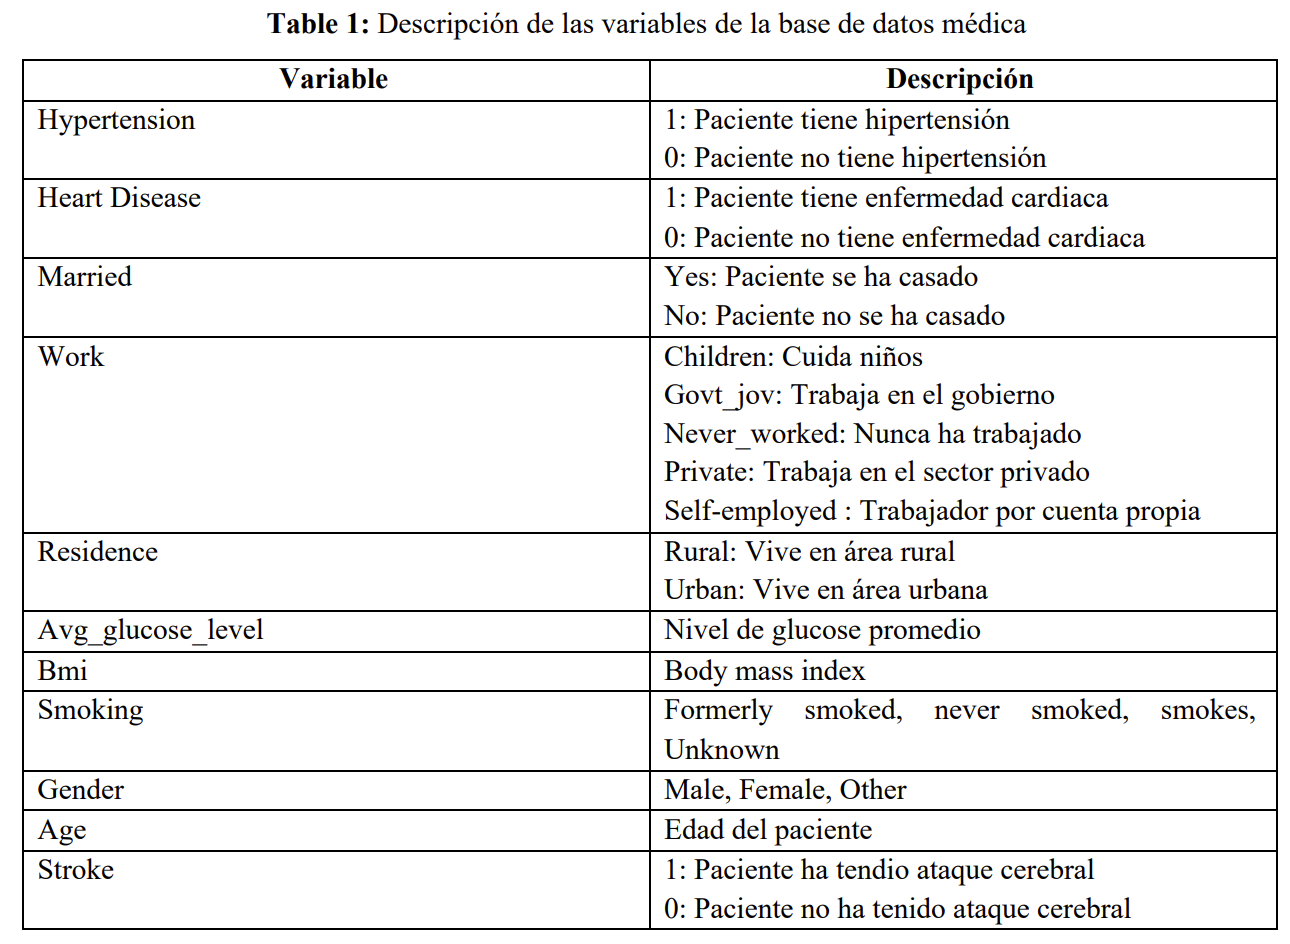

Se va a analizar por cada variable, el tipo, y se va a tratar los valores nulos segun corresponda el caso 

# Código para la detección de valores nulos

In [289]:
# Usar isnull() para obtener una máscara booleana de los valores nulos en el DataFrame
mask = pro_df.isnull()

# Imprimir la máscara booleana
print("Máscara booleana de valores nulos:")
print(mask)

# Usar isna() para obtener una máscara booleana de los valores nulos en el DataFrame
mask_na = pro_df.isna()

# Imprimir la máscara booleana
print("\nMáscara booleana de valores nulos usando isna():")
print(mask_na)

# Usar el método any() para obtener una máscara booleana que indica si hay al menos un valor nulo en cada fila
mask_row = pro_df.isnull().any(axis=1)

# Imprimir la máscara booleana de filas con al menos un valor nulo
print("\nMáscara booleana de filas con al menos un valor nulo:")
print(mask_row)

# Usar el método sum() para obtener el número de valores nulos en cada columna
n_null_values = pro_df.isnull().sum()

# Imprimir el número de valores nulos en cada columna
print("\nNúmero de valores nulos por columna:")
print(n_null_values)

Máscara booleana de valores nulos:
      Hypertension  Heart Disease  Married   Work  Residence  \
0            False          False    False  False      False   
1            False          False    False  False      False   
2            False          False    False  False      False   
3            False          False    False  False      False   
4            False          False    False  False      False   
...            ...            ...      ...    ...        ...   
5105         False          False    False  False      False   
5106         False          False    False  False      False   
5107         False          False    False  False      False   
5108         False          False    False  False      False   
5109         False          False    False  False      False   

      Avg_glucose_level    Bmi  Smoking  Gender    Age  Stroke  
0                 False  False    False   False  False   False  
1                 False   True    False   False  False   False  
2

# Q1 - EDA

### Variable Hypertension

In [290]:
pro_df["Hypertension"].value_counts() # existe la totalidad de variables binarias

0    4612
1     498
Name: Hypertension, dtype: int64

### Variable Heart Disease

In [291]:
pro_df["Heart Disease"].value_counts() # existe la totalidad de variables binarias

0    4834
1     276
Name: Heart Disease, dtype: int64

### Variable Stroke

In [292]:
pro_df["Stroke"].value_counts() # existe la totalidad de variables binarias

0    4861
1     249
Name: Stroke, dtype: int64

### Variable Married 

Esto es una variable binaria que nombramos Yes=1 y No=0

In [293]:
pro_df["Married"].value_counts() # existe la totalidad de variables binarias

Yes    3353
No     1757
Name: Married, dtype: int64

In [294]:
pro_df = pro_df.replace({"Yes":1,"No":0}) # se cambia a la columna married con variables binarias
pro_df.head(2)

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,Male,67.0,1
1,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,Female,61.0,1


### Variable Work

Como se observa los diferentes valores de count corresponen a las diferentes modalidades de trabajo, por lo que se decidió convertir las diferentes categorias en variables dummies y agregar esta nueva matriz de variables a la dataframe original, ahora existen difetenes vairbales de tipos de trabajos 

In [295]:
pro_df["Work"].value_counts() # existe la totalidad de variables binarias

Private          2919
Self-employed     818
children          687
Govt_job          657
Never_worked       22
sdfsdf              3
dsfsdf              2
k–sdh-k             1
sdsd-i              1
Name: Work, dtype: int64

In [296]:
pro_df

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,Male,67.0,1
1,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,Female,61.0,1
2,0,1,1,Private,Rural,105.92,32.5,never smoked,Male,80.0,1
3,0,0,1,Private,Urban,171.23,34.4,smokes,Female,49.0,1
4,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,Female,79.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,1,Private,Urban,83.75,NaN,never smoked,Female,80.0,0
5106,0,0,1,dsfsdf,Urban,125.20,40.0,never smoked,Female,81.0,0
5107,0,0,1,Self-employed,Rural,82.99,30.6,never smoked,Female,35.0,0
5108,0,0,1,Private,Rural,166.29,25.6,formerly smoked,Male,51.0,0


In [297]:
pro_df = pro_df.drop(pro_df[pro_df['Work'].isin(['sdfsdf', 'dsfsdf', 'sdsd-i',"k–sdh-k"])].index)
# dado que salen datos que no son propios de las categorias esos se deben eliminar

In [298]:
pro_df['Work'].unique
#Para verificar que los valores que no corresponden a las categorías de work se eliminaron correctamente

<bound method Series.unique of 0             Private
1       Self-employed
2             Private
3             Private
4       Self-employed
            ...      
5104         children
5105          Private
5107    Self-employed
5108          Private
5109         Govt_job
Name: Work, Length: 5103, dtype: object>

In [299]:
# Creamos las variables dummies para crear la matriz en lugar de las diferentes categorias de trabajo 
dummies_work = pd.get_dummies(pro_df['Work'], drop_first=True) # drop_first es para mantener la colinealidad y se elimina una columna
dummies_work

,Never_worked,Private,Self-employed,children
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
5104,0,0,0,1
5105,0,1,0,0
5107,0,0,1,0
5108,0,1,0,0


In [300]:
# Añadimos las variables dummies al pro_df
pro_df = pd.concat([pro_df, dummies_work], axis = 1)

# Eliminamos la variable original de Work
pro_df = pro_df.drop(columns=['Work'])

In [301]:
pro_df.head()

,Hypertension,Heart Disease,Married,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke,Never_worked,Private,Self-employed,children
0,0,1,1,Urban,228.69,36.6,formerly smoked,Male,67.0,1,0,1,0,0
1,0,0,1,Rural,202.21,NaN,never smoked,Female,61.0,1,0,0,1,0
2,0,1,1,Rural,105.92,32.5,never smoked,Male,80.0,1,0,1,0,0
3,0,0,1,Urban,171.23,34.4,smokes,Female,49.0,1,0,1,0,0
4,1,0,1,Rural,174.12,24.0,never smoked,Female,79.0,1,0,0,1,0


In [302]:
pro_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5103 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hypertension       5103 non-null   int64  
 1   Heart Disease      5103 non-null   int64  
 2   Married            5103 non-null   int64  
 3   Residence          5103 non-null   object 
 4   Avg_glucose_level  5103 non-null   float64
 5   Bmi                4903 non-null   float64
 6   Smoking            5103 non-null   object 
 7   Gender             5103 non-null   object 
 8   Age                5103 non-null   float64
 9   Stroke             5103 non-null   int64  
 10  Never_worked       5103 non-null   uint8  
 11  Private            5103 non-null   uint8  
 12  Self-employed      5103 non-null   uint8  
 13  children           5103 non-null   uint8  
dtypes: float64(3), int64(4), object(3), uint8(4)
memory usage: 458.5+ KB


### Variable Residence 

In [305]:
pro_df["Residence"].value_counts() # existe la totalidad de variables binarias
#se verificó que no existen otros valores mas que Urban y Rural 

1    2591
0    2512
Name: Residence, dtype: int64

In [306]:
pro_df = pro_df.replace({"Urban":1,"Rural":0}) # se cambia a la columna residence con variables binarias
pro_df.head()

,Hypertension,Heart Disease,Married,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke,Never_worked,Private,Self-employed,children
0,0,1,1,1,228.69,36.6,formerly smoked,Male,67.0,1,0,1,0,0
1,0,0,1,0,202.21,NaN,never smoked,Female,61.0,1,0,0,1,0
2,0,1,1,0,105.92,32.5,never smoked,Male,80.0,1,0,1,0,0
3,0,0,1,1,171.23,34.4,smokes,Female,49.0,1,0,1,0,0
4,1,0,1,0,174.12,24.0,never smoked,Female,79.0,1,0,0,1,0


### Variable Avg_glc_level

In [307]:
#Se analizan los valores nulos, y se los eliminan 
pd.to_numeric(pro_df["Avg_glucose_level"], errors='coerce')
pro_df = pro_df[pro_df["Avg_glucose_level"].notnull()]

pro_df.shape

(5103, 14)

In [308]:
m = pro_df['Avg_glucose_level'].mean()
print(m)

106.14515970997452


In [309]:
s = pro_df['Avg_glucose_level'].std()
print(s)

45.2739822603109


In [310]:
atipicos = m + 3*s # el valor comun de una desviación estandar es de 3
print(atipicos)

241.9671064909072


In [311]:
filas_valores_atipicos = pro_df[(pro_df['Avg_glucose_level'] >= 238.52)].index
print(filas_valores_atipicos) 
# Son los indices de los valores que son mayores o iguales a238.52

Int64Index([  33,   45,   76,   97,  122,  123,  135,  149,  193,  196,  220,
             243,  256,  303,  330,  343,  386,  552,  563,  708,  755,  785,
            1067, 1070, 1113, 1207, 1228, 1384, 1436, 1453, 1529, 1531, 1626,
            2182, 2203, 2257, 2273, 2293, 2462, 2494, 2633, 2693, 2751, 2918,
            3088, 3215, 3342, 3391, 3393, 3480, 3606, 3771, 4048, 4249, 4283,
            4356, 4447, 4457, 4470, 4598, 4711, 4750, 4909, 4983, 5034],
           dtype='int64')


In [312]:
valores_atipicos = pro_df.loc[filas_valores_atipicos, 'Avg_glucose_level']
print(valores_atipicos)
# Son los valores de lo antes mencionado

33      252.72
45      243.58
76      240.09
97      240.59
122     259.63
         ...  
4711    242.62
4750    240.69
4909    243.52
4983    267.60
5034    253.86
Name: Avg_glucose_level, Length: 65, dtype: float64


In [313]:
# eliminar las filas
pro_df.drop(filas_valores_atipicos, inplace=True)

In [314]:
pro_df.shape 

(5038, 14)

### Variable Bmi

In [315]:
pro_df["Bmi"].value_counts() # existe la totalidad de variables binarias

28.7    41
28.4    38
26.7    37
27.7    37
27.6    37
        ..
44.4     1
57.7     1
51.8     1
13.4     1
14.9     1
Name: Bmi, Length: 418, dtype: int64

In [316]:
# Calcular la media de la columna "Bmi"
mean_bmi = pro_df["Bmi"].mean()

# Reemplazar los valores NaN con la media de la columna "Bmi"
pro_df["Bmi"].fillna(mean_bmi, inplace=True)

In [317]:
pro_df

,Hypertension,Heart Disease,Married,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke,Never_worked,Private,Self-employed,children
0,0,1,1,1,228.69,36.600000,formerly smoked,Male,67.0,1,0,1,0,0
1,0,0,1,0,202.21,61.872429,never smoked,Female,61.0,1,0,0,1,0
2,0,1,1,0,105.92,32.500000,never smoked,Male,80.0,1,0,1,0,0
3,0,0,1,1,171.23,34.400000,smokes,Female,49.0,1,0,1,0,0
4,1,0,1,0,174.12,24.000000,never smoked,Female,79.0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,0,0,0,103.08,18.600000,Unknown,Female,13.0,0,0,0,0,1
5105,1,0,1,1,83.75,61.872429,never smoked,Female,80.0,0,0,1,0,0
5107,0,0,1,0,82.99,30.600000,never smoked,Female,35.0,0,0,0,1,0
5108,0,0,1,0,166.29,25.600000,formerly smoked,Male,51.0,0,0,1,0,0


In [318]:
pro_df.shape

(5038, 14)

In [319]:
# Usar isnull() para obtener una máscara booleana de los valores nulos en el DataFrame
mask = pro_df.isnull()

# Imprimir la máscara booleana
print("Máscara booleana de valores nulos:")
print(mask)

# Usar isna() para obtener una máscara booleana de los valores nulos en el DataFrame
mask_na = pro_df.isna()

# Imprimir la máscara booleana
print("\nMáscara booleana de valores nulos usando isna():")
print(mask_na)

# Usar el método any() para obtener una máscara booleana que indica si hay al menos un valor nulo en cada fila
mask_row = pro_df.isnull().any(axis=1)

# Imprimir la máscara booleana de filas con al menos un valor nulo
print("\nMáscara booleana de filas con al menos un valor nulo:")
print(mask_row)

# Usar el método sum() para obtener el número de valores nulos en cada columna
n_null_values = pro_df.isnull().sum()

# Imprimir el número de valores nulos en cada columna
print("\nNúmero de valores nulos por columna:")
print(n_null_values)

Máscara booleana de valores nulos:
      Hypertension  Heart Disease  Married  Residence  Avg_glucose_level  \
0            False          False    False      False              False   
1            False          False    False      False              False   
2            False          False    False      False              False   
3            False          False    False      False              False   
4            False          False    False      False              False   
...            ...            ...      ...        ...                ...   
5104         False          False    False      False              False   
5105         False          False    False      False              False   
5107         False          False    False      False              False   
5108         False          False    False      False              False   
5109         False          False    False      False              False   

        Bmi  Smoking  Gender    Age  Stroke  Never_w

### Variable Age

Se va tomar en consideración los datos que esten en el rango 1 a 100 años

In [320]:
pro_df["Age"]=pro_df.Age.astype(int)


In [321]:
pro_df["Age"].value_counts() # existe la totalidad de variables binarias

78    100
57     95
52     89
54     86
51     85
     ... 
11     36
10     35
4      34
7      32
6      24
Name: Age, Length: 83, dtype: int64

In [322]:
pro_df.shape

(5038, 14)

### Variable Smoking

In [323]:
pro_df["Smoking"].value_counts() # existe la totalidad de variables binarias

never smoked       1862
Unknown            1537
formerly smoked     869
smokes              770
Name: Smoking, dtype: int64

In [324]:
# Creamos las variables dummies para crear la matriz en lugar de las diferentes categorias de trabajo 
dummies_smoking = pd.get_dummies(pro_df['Smoking'],drop_first = True)
dummies_smoking.head()

,formerly smoked,never smoked,smokes
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [325]:
# Añadimos las variables dummies al pro_df
pro_df = pd.concat([pro_df, dummies_smoking], axis = 1)

# Eliminamos la vairable original de Work
pro_df = pro_df.drop(columns=['Smoking'])

In [326]:
pro_df.head()

,Hypertension,Heart Disease,Married,Residence,Avg_glucose_level,Bmi,Gender,Age,Stroke,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,0,1,1,1,228.69,36.600000,Male,67,1,0,1,0,0,1,0,0
1,0,0,1,0,202.21,61.872429,Female,61,1,0,0,1,0,0,1,0
2,0,1,1,0,105.92,32.500000,Male,80,1,0,1,0,0,0,1,0
3,0,0,1,1,171.23,34.400000,Female,49,1,0,1,0,0,0,0,1
4,1,0,1,0,174.12,24.000000,Female,79,1,0,0,1,0,0,1,0


### Variable Gender 

In [327]:
pro_df.shape

(5038, 16)

In [328]:
# Localizar el valor específico en la columna 'columna_nombre'
valor_buscar = 'Other'
fila_resultado = pro_df[pro_df['Gender'] == valor_buscar]
# Mostrar el resultado
print(fila_resultado)

      Hypertension  Heart Disease  Married  Residence  Avg_glucose_level  \
3116             0              0        0          0             143.33   

       Bmi Gender  Age  Stroke  Never_worked  Private  Self-employed  \
3116  22.4  Other   26       0             0        1              0   

      children  formerly smoked  never smoked  smokes  
3116         0                1             0       0  


In [329]:
pro_df.at[3116, 'Gender'] = 1

In [330]:
# Localizar el valor específico en la columna 'columna_nombre'
valor_buscar = 'Other'
fila_resultado = pro_df[pro_df['Gender'] == valor_buscar]
# Mostrar el resultado
print(fila_resultado)

Empty DataFrame
Columns: [Hypertension, Heart Disease, Married, Residence, Avg_glucose_level, Bmi, Gender, Age, Stroke, Never_worked, Private, Self-employed, children, formerly smoked, never smoked, smokes]
Index: []


In [331]:
pro_df["Gender"].value_counts() # existe la totalidad de variables binarias

Female    2951
Male      2086
1            1
Name: Gender, dtype: int64

In [332]:
pro_df = pro_df.replace({"Female":1,"Male":0, "Other":1}) # se cambia a la columna married con variables binarias
pro_df

,Hypertension,Heart Disease,Married,Residence,Avg_glucose_level,Bmi,Gender,Age,Stroke,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,0,1,1,1,228.69,36.600000,0,67,1,0,1,0,0,1,0,0
1,0,0,1,0,202.21,61.872429,1,61,1,0,0,1,0,0,1,0
2,0,1,1,0,105.92,32.500000,0,80,1,0,1,0,0,0,1,0
3,0,0,1,1,171.23,34.400000,1,49,1,0,1,0,0,0,0,1
4,1,0,1,0,174.12,24.000000,1,79,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,0,0,0,103.08,18.600000,1,13,0,0,0,0,1,0,0,0
5105,1,0,1,1,83.75,61.872429,1,80,0,0,1,0,0,0,1,0
5107,0,0,1,0,82.99,30.600000,1,35,0,0,0,1,0,0,1,0
5108,0,0,1,0,166.29,25.600000,0,51,0,0,1,0,0,1,0,0


In [333]:
pro_df["Gender"].value_counts() # existe la totalidad de variables binarias

1    2952
0    2086
Name: Gender, dtype: int64

In [334]:
pro_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5038 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hypertension       5038 non-null   int64  
 1   Heart Disease      5038 non-null   int64  
 2   Married            5038 non-null   int64  
 3   Residence          5038 non-null   int64  
 4   Avg_glucose_level  5038 non-null   float64
 5   Bmi                5038 non-null   float64
 6   Gender             5038 non-null   int64  
 7   Age                5038 non-null   int64  
 8   Stroke             5038 non-null   int64  
 9   Never_worked       5038 non-null   uint8  
 10  Private            5038 non-null   uint8  
 11  Self-employed      5038 non-null   uint8  
 12  children           5038 non-null   uint8  
 13  formerly smoked    5038 non-null   uint8  
 14  never smoked       5038 non-null   uint8  
 15  smokes             5038 non-null   uint8  
dtypes: float64(2), int64(7),

### Correlación entre variables predictivas

In [335]:
correl = pro_df[['Hypertension', 'Heart Disease', 'Married', 'Residence',
       'Avg_glucose_level', 'Bmi', 'Gender', 'Age', 'Stroke', 'Never_worked',
       'Private', 'Self-employed', 'children', 'formerly smoked',
       'never smoked', 'smokes']]
matriz_correl = correl.corr()
print(matriz_correl)
# Se hace la correlación con todas las variables y se observa cuales tienen mayor efecto en la variable respuesta


                   Hypertension  Heart Disease   Married  Residence  \
Hypertension           1.000000       0.103863  0.161948  -0.002746   
Heart Disease          0.103863       1.000000  0.110421   0.006419   
Married                0.161948       0.110421  1.000000   0.006136   
Residence             -0.002746       0.006419  0.006136   1.000000   
Avg_glucose_level      0.165169       0.144164  0.140624  -0.008450   
Bmi                    0.016441      -0.005770 -0.006548  -0.000369   
Gender                -0.014865      -0.085333  0.031305   0.004288   
Age                    0.275549       0.260255  0.679589   0.013914   
Stroke                 0.117113       0.118172  0.104121   0.018402   
Never_worked          -0.021516      -0.015480 -0.090738   0.023112   
Private               -0.007040      -0.002363  0.156412  -0.019391   
Self-employed          0.117812       0.084843  0.191356   0.009382   
children              -0.129097      -0.090271 -0.544428  -0.001788   
former

In [336]:
co_g = pro_df[['Hypertension', 'Heart Disease', 'Married','Avg_glucose_level','Age']]
matriz_co_g = co_g.corr()
print(matriz_co_g)

# Se escogieron las de 'Hypertension', 'Heart Disease', 'Married','Stroke','Avg_glucose_level'y'Age'

                   Hypertension  Heart Disease   Married  Avg_glucose_level  \
Hypertension           1.000000       0.103863  0.161948           0.165169   
Heart Disease          0.103863       1.000000  0.110421           0.144164   
Married                0.161948       0.110421  1.000000           0.140624   
Avg_glucose_level      0.165169       0.144164  0.140624           1.000000   
Age                    0.275549       0.260255  0.679589           0.213794   

                        Age  
Hypertension       0.275549  
Heart Disease      0.260255  
Married            0.679589  
Avg_glucose_level  0.213794  
Age                1.000000  


In [337]:
pro_df.columns

Index(['Hypertension', 'Heart Disease', 'Married', 'Residence',
       'Avg_glucose_level', 'Bmi', 'Gender', 'Age', 'Stroke', 'Never_worked',
       'Private', 'Self-employed', 'children', 'formerly smoked',
       'never smoked', 'smokes'],
      dtype='object')

In [338]:
predictors = ['Hypertension', 'Heart Disease', 'Married', 'Residence',
       'Avg_glucose_level', 'Bmi', 'Gender', 'Age', 'Never_worked',
       'Private', 'Self-employed', 'children', 'formerly smoked',
       'never smoked', 'smokes']

outcome = 'Stroke'
#matriz de variables predictivas dummies
X = pro_df[predictors]
# se guarda en y la variablede interes
y = pro_df[outcome]
X.head()

,Hypertension,Heart Disease,Married,Residence,Avg_glucose_level,Bmi,Gender,Age,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,0,1,1,1,228.69,36.600000,0,67,0,1,0,0,1,0,0
1,0,0,1,0,202.21,61.872429,1,61,0,0,1,0,0,1,0
2,0,1,1,0,105.92,32.500000,0,80,0,1,0,0,0,1,0
3,0,0,1,1,171.23,34.400000,1,49,0,1,0,0,0,0,1
4,1,0,1,0,174.12,24.000000,1,79,0,0,1,0,0,1,0


In [339]:
pro_df.shape

(5038, 16)

Text(0.5, 1, 'Matriz de Correlacion')

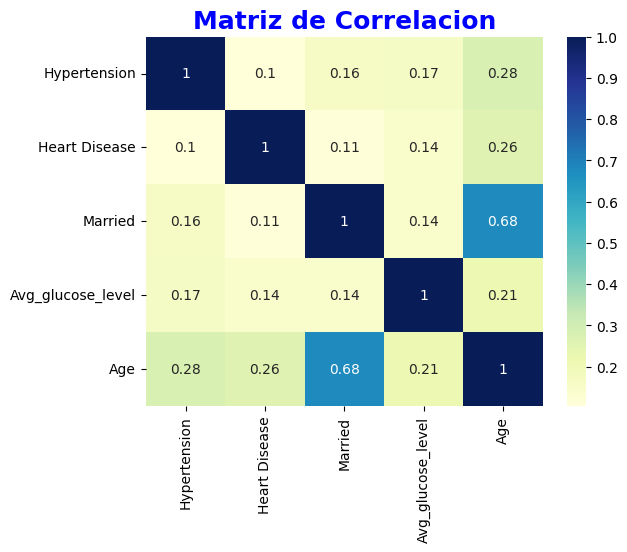

In [340]:
import seaborn as sns
g_co=sns.heatmap(matriz_co_g,cmap='YlGnBu',annot=True) #grafico de calor con la correlacion 
g_co.set_title("Matriz de Correlacion",fontsize=18, fontweight="bold", y=1, color="blue")

In [342]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Stroke, dtype: int64

### Vizualizacion de Datos 


Grafico de Barras de la Variable Married 

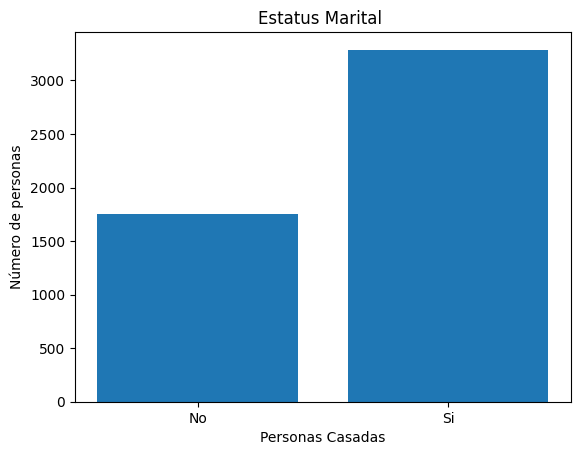

In [343]:
valores = [sum(co_g["Married"]==0), sum(co_g["Married"]==1)]

plt.bar([0,1], valores)
plt.xticks([0,1], ['No', 'Si'])
plt.ylabel('Número de personas')
plt.xlabel("Personas Casadas")
plt.title('Estatus Marital ')
plt.show()

Grafico de barras para la variable de Hipertensión 

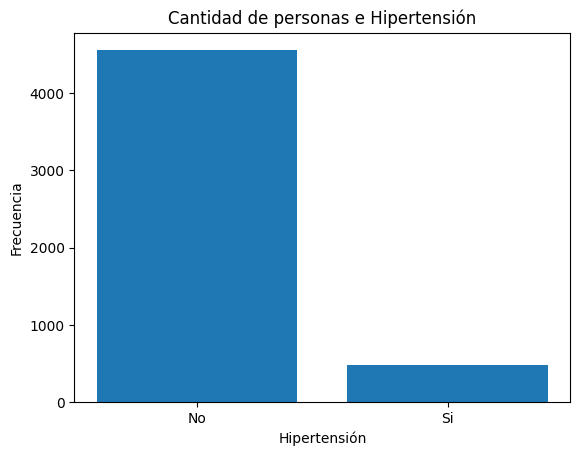

In [344]:
valores = [sum(co_g["Hypertension"]==0), sum(co_g["Hypertension"]==1)]

plt.bar([0,1], valores)
plt.xticks([0,1], ['No', 'Si'])
plt.ylabel('Frecuencia')
plt.xlabel("Hipertensión")
plt.title("Cantidad de personas e Hipertensión")
plt.show()

Grafico de Pastel para la Variable de Enfermedades Cardiacas 

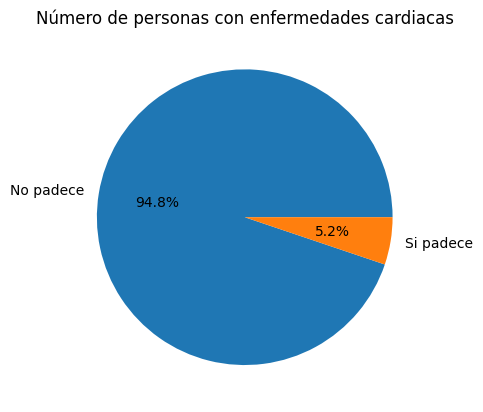

In [345]:
valores = [sum(co_g["Heart Disease"]==0), sum(co_g["Heart Disease"]==1)]

plt.pie(valores, labels=['No padece', 'Si padece'],  autopct='%1.1f%%')
plt.title('Número de personas con enfermedades cardiacas')
plt.show()


Grafico de histograma del nivel promedio de glucosa en sangre 

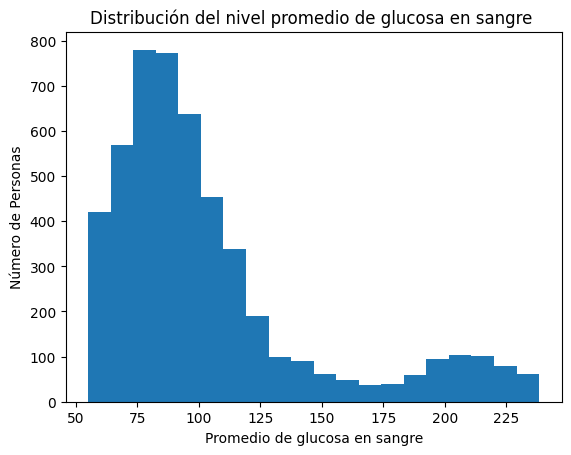

In [346]:
plt.hist(co_g["Avg_glucose_level"], bins=20)
plt.xlabel('Promedio de glucosa en sangre')
plt.ylabel('Número de Personas')
plt.title('Distribución del nivel promedio de glucosa en sangre ')
plt.show()


In [347]:
#Grafico de Caja de Bijotes para Variable de Edad 

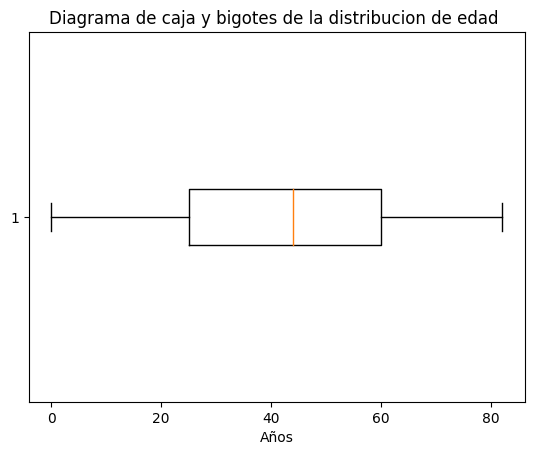

In [348]:
plt.boxplot(co_g["Age"], vert=False)
plt.xlabel('Años')
plt.title('Diagrama de caja y bigotes de la distribucion de edad ')
plt.show()


# Sección 3: Partición del Dataset


Partition the dataset into training (80%), validation (10%), and test sets (10%). 

from sklearn.model_selection import train_test_split

In [349]:
!pip install fast_ml


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [350]:
from fast_ml.model_development import train_valid_test_split


In [351]:
# Realizar la partición en sets de entrenamiento, validación y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42) 

# Imprimir los tamaños de los sets de datos resultantes
print("Tamaño del set de entrenamiento: ", X_train.shape)
print("Tamaño del set de validación: ", X_val.shape)
print("Tamaño del set de test: ", X_test.shape)

Tamaño del set de entrenamiento:  (4080, 15)
Tamaño del set de validación:  (454, 15)
Tamaño del set de test:  (504, 15)


In [352]:
X_train.value_counts()

Hypertension  Heart Disease  Married  Residence  Avg_glucose_level  Bmi        Gender  Age  Never_worked  Private  Self-employed  children  formerly smoked  never smoked  smokes
0             0              0        0          55.12              21.800000  1       21   0             1        0              0         0                1             0         1
                             1        1          79.47              28.100000  1       45   0             0        0              0         0                1             0         1
                                                 78.48              25.800000  0       69   0             0        1              0         1                0             0         1
                                                 78.49              31.800000  0       42   0             1        0              0         0                0             1         1
                                                 78.78              24.000000  0       80 

In [353]:
X_train.shape

(4080, 15)

In [354]:
X_train.head()

,Hypertension,Heart Disease,Married,Residence,Avg_glucose_level,Bmi,Gender,Age,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
4686,0,0,1,0,96.82,25.0,1,70,0,0,1,0,0,1,0
3211,0,0,1,1,83.70,20.6,1,42,0,0,0,0,0,1,0
3941,0,0,1,0,67.10,27.1,1,32,0,1,0,0,0,0,0
5058,0,0,0,0,89.29,23.4,0,21,0,1,0,0,0,1,0
4658,0,0,1,1,99.44,25.0,1,55,0,0,0,0,1,0,0


**Backwards Selection Method:**

Lo aplicamos para la selección de las mejores variables predictivas

In [355]:
import sklearn
import matplotlib.pyplot as plt

In [356]:
%matplotlib inline
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [357]:
def train_model(variables):
    model = LinearRegression()
    model.fit(X_train[variables], y_train)
    return model

def score_model(model, variables):
    pred_y = model.predict(X_train[variables])
    return -adjusted_r2_score(y_train, pred_y, model)

best_model, best_variables = backward_elimination(X_train.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Hypertension, Heart Disease, Married, Residence, Avg_glucose_level, Bmi, Gender, Age, Never_worked, Private, Self-employed, children, formerly smoked, never smoked, smokes
Start: score=-0.07
Step: score=-0.07, remove smokes
Step: score=-0.07, remove Bmi
Step: score=-0.07, remove formerly smoked
Step: score=-0.07, remove never smoked
Step: score=-0.07, remove Self-employed
Step: score=-0.07, remove Gender
Step: score=-0.07, remove Never_worked
Step: score=-0.07, remove None
['Hypertension', 'Heart Disease', 'Married', 'Residence', 'Avg_glucose_level', 'Age', 'Private', 'children']


#Sección 4: Aplicación de Técnicas Estadísticas con Modelo de Regresión Logística

# Balanceo del Dataset - Método 1

**SMOTE Technique:**

In [358]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [359]:
from imblearn.over_sampling import SMOTE


In [360]:
# Instanciar el objeto SMOTE para generar muestras sintéticas
smote = SMOTE(random_state=42)

# Aplicar SMOTE para balancear el conjunto de datos de entrenamiento
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificar los tamaños de los conjuntos de datos antes y después de aplicar SMOTE
print("Tamaño del conjunto de datos original: ", X_train.shape, y_train.shape)
print("Tamaño del conjunto de datos balanceado con SMOTE: ", X_train_resampled.shape, y_train_resampled.shape)

# Ahora puedes utilizar X_train_resampled e y_train_resampled como tus nuevos conjuntos de datos de entrenamiento
# que han sido balanceados usando la técnica SMOTE.

Tamaño del conjunto de datos original:  (4080, 15) (4080,)
Tamaño del conjunto de datos balanceado con SMOTE:  (7780, 15) (7780,)


In [361]:
X_train_resampled.head

<bound method NDFrame.head of       Hypertension  Heart Disease  Married  Residence  Avg_glucose_level  \
0                0              0        1          0          96.820000   
1                0              0        1          1          83.700000   
2                0              0        1          0          67.100000   
3                0              0        0          0          89.290000   
4                0              0        1          1          99.440000   
...            ...            ...      ...        ...                ...   
7775             0              0        1          1          92.849809   
7776             0              0        1          0         110.560858   
7777             1              0        1          0         209.886989   
7778             0              0        1          1         105.302513   
7779             0              0        0          0         201.181093   

            Bmi  Gender  Age  Never_worked  Private  Self

# Apply multiple linear regression

In [362]:
pip install mord

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [363]:
from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
#!conda install -c conda-forge mord
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

In [364]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [365]:
# fit a logistic regression
# penalty= penalty for coefficient values ("l1", "l2", "none")
logit_reg = LogisticRegression(penalty="none", solver='newton-cg')
logit_reg.fit(X_train_resampled, y_train_resampled)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())

intercept  -0.00103318851701355
       Hypertension  Heart Disease   Married  Residence  Avg_glucose_level  \
coeff     -0.000203      -0.000102 -0.000317  -0.001114          -0.005365   

            Bmi    Gender       Age  Never_worked   Private  Self-employed  \
coeff -0.006067 -0.001322  0.021782     -0.000015 -0.001161       -0.00043   

       children  formerly smoked  never smoked    smokes  
coeff -0.000473        -0.000429     -0.000934 -0.000516  


# Probabilities for Predicting
# Predicciones con el Set de Validación

In [366]:
# Predict the classes from the validation set
# A default probability threshold of 0.5 is used
logit_reg_pred = logit_reg.predict(X_val)

# Returns the probabilities of the validation set
# Returns an array with size (num observations, num classes)
logit_reg_proba = logit_reg.predict_proba(X_val)


logit_result = pd.DataFrame({'actual': y_val, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })

logit_result

,actual,p(0),p(1),predicted
3068,0,0.251291,0.748709,1
1363,0,0.380711,0.619289,1
2266,0,0.385930,0.614070,1
2500,0,0.298020,0.701980,1
3605,0,0.755384,0.244616,0
...,...,...,...,...
304,0,0.531399,0.468601,0
4921,0,0.522125,0.477875,0
741,0,0.314531,0.685469,1
3888,0,0.663701,0.336299,0


In [367]:
logit_reg_proba

array([[2.51291362e-001, 7.48708638e-001],
       [3.80710578e-001, 6.19289422e-001],
       [3.85929947e-001, 6.14070053e-001],
       [2.98019569e-001, 7.01980431e-001],
       [7.55383728e-001, 2.44616272e-001],
       [3.43565462e-001, 6.56434538e-001],
       [4.15210635e-001, 5.84789365e-001],
       [3.17776839e-001, 6.82223161e-001],
       [6.10247457e-001, 3.89752543e-001],
       [2.47508436e-001, 7.52491564e-001],
       [3.79948804e-001, 6.20051196e-001],
       [3.36964958e-001, 6.63035042e-001],
       [5.71800190e-001, 4.28199810e-001],
       [6.01285810e-001, 3.98714190e-001],
       [3.80758653e-001, 6.19241347e-001],
       [4.77573394e-001, 5.22426606e-001],
       [5.55337623e-001, 4.44662377e-001],
       [3.89977332e-001, 6.10022668e-001],
       [6.61436776e-001, 3.38563224e-001],
       [3.89824046e-001, 6.10175954e-001],
       [3.81920057e-001, 6.18079943e-001],
       [4.51988917e-001, 5.48011083e-001],
       [4.63613106e-001, 5.36386894e-001],
       [3.7

In [368]:
# Calcular la exactitud del modelo en el conjunto de validación
accuracy_val = accuracy_score(y_val, logit_reg_pred)

print("Exactitud del modelo en el conjunto de validación: {:.2f}".format(accuracy_val))

Exactitud del modelo en el conjunto de validación: 0.42


# Predicciones con el Set de Test: 



In [369]:
X_test.head()

,Hypertension,Heart Disease,Married,Residence,Avg_glucose_level,Bmi,Gender,Age,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
4859,0,0,1,0,66.22,34.400000,0,43,0,1,0,0,0,0,0
3287,0,0,0,0,81.54,31.800000,0,34,0,0,1,0,1,0,0
2879,1,0,0,0,97.87,61.872429,1,33,0,1,0,0,0,0,1
3096,0,0,0,1,76.55,29.100000,1,13,0,0,0,1,0,0,0
3359,0,0,0,1,59.07,21.600000,1,23,0,1,0,0,0,1,0


**NOTA:**
Se corrió una validación de nulos en el set de test debido a un error de codificación en la variable Gender:

In [370]:
# Usar isnull() para obtener una máscara booleana de los valores nulos en el DataFrame
mask = X_test.isnull()

# Imprimir la máscara booleana
print("Máscara booleana de valores nulos:")
print(mask)

# Usar isna() para obtener una máscara booleana de los valores nulos en el DataFrame
mask_na = X_test.isna()

# Imprimir la máscara booleana
print("\nMáscara booleana de valores nulos usando isna():")
print(mask_na)

# Usar el método any() para obtener una máscara booleana que indica si hay al menos un valor nulo en cada fila
mask_row = X_test.isnull().any(axis=1)

# Imprimir la máscara booleana de filas con al menos un valor nulo
print("\nMáscara booleana de filas con al menos un valor nulo:")
print(mask_row)

# Usar el método sum() para obtener el número de valores nulos en cada columna
n_null_values = X_test.isnull().sum()

# Imprimir el número de valores nulos en cada columna
print("\nNúmero de valores nulos por columna:")
print(n_null_values)

Máscara booleana de valores nulos:
      Hypertension  Heart Disease  Married  Residence  Avg_glucose_level  \
4859         False          False    False      False              False   
3287         False          False    False      False              False   
2879         False          False    False      False              False   
3096         False          False    False      False              False   
3359         False          False    False      False              False   
...            ...            ...      ...        ...                ...   
4034         False          False    False      False              False   
187          False          False    False      False              False   
2987         False          False    False      False              False   
2691         False          False    False      False              False   
84           False          False    False      False              False   

        Bmi  Gender    Age  Never_worked  Private  S

In [371]:
# Realizar predicciones en el conjunto de test
y_pred_test = logit_reg.predict(X_test)

# Calcular la exactitud del modelo en el conjunto de test
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del modelo en el conjunto de test: {:.2f}".format(accuracy_test))

Exactitud del modelo en el conjunto de test: 0.42


#   Calculate the confusion matrix


In [372]:
classificationSummary(y_train_resampled, logit_reg.predict(X_train_resampled))
classificationSummary(y_val, logit_reg.predict(X_val))

Confusion Matrix (Accuracy 0.6446)

       Prediction
Actual    0    1
     0 1485 2405
     1  360 3530
Confusion Matrix (Accuracy 0.4163)

       Prediction
Actual   0   1
     0 173 264
     1   1  16


# Balanceo de la Base de Datos - Metodo 2

**Tomek Links Method**

In [373]:
from imblearn.under_sampling import TomekLinks

# Crear una instancia del objeto TomekLinks
tomek_links = TomekLinks()

# Aplicar Tomek Links en el conjunto de entrenamiento
X_train_resampled2, y_train_resampled2 = tomek_links.fit_resample(X_train, y_train)

# Verificar los tamaños de los conjuntos de datos antes y después de aplicar SMOTE
print("Tamaño del conjunto de datos original: ", X_train.shape, y_train.shape)
print("Tamaño del conjunto de datos balanceado con TomekLinka: ", X_train_resampled2.shape, y_train_resampled2.shape)

# Se debe utilizar X_train_resampled2 e y_train_resampled2 como los nuevos conjuntos de datos de entrenamiento
# que han sido balanceados usando la técnica Tomek Links.

Tamaño del conjunto de datos original:  (4080, 15) (4080,)
Tamaño del conjunto de datos balanceado con TomekLinka:  (3987, 15) (3987,)


# Apply multiple linear regression

In [374]:
# fit a logistic regression
# penalty= penalty for coefficient values ("l1", "l2", "none")
logit_reg = LogisticRegression(penalty="none", solver='newton-cg')
logit_reg.fit(X_train_resampled2, y_train_resampled2)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())

intercept  -0.0017506633483420535
       Hypertension  Heart Disease   Married  Residence  Avg_glucose_level  \
coeff      0.000297        0.00025 -0.000283  -0.000767          -0.027067   

            Bmi    Gender       Age  Never_worked  Private  Self-employed  \
coeff -0.009502 -0.001089  0.004698     -0.000023  -0.0009       0.000109   

       children  formerly smoked  never smoked    smokes  
coeff -0.000713         0.000019      -0.00057 -0.000247  


# Probabilities for Predicting
# Predicciones con el Set de Validación

In [375]:
# Predict the classes from the validation set
# A default probability threshold of 0.5 is used
logit_reg_pred = logit_reg.predict(X_val)

# Returns the probabilities of the validation set
# Returns an array with size (num observations, num classes)
logit_reg_proba = logit_reg.predict_proba(X_val)


logit_result = pd.DataFrame({'actual': y_val, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })

logit_result

,actual,p(0),p(1),predicted
3068,0,0.911590,0.088410,0
1363,0,0.968610,0.031390,0
2266,0,0.952045,0.047955,0
2500,0,0.806304,0.193696,0
3605,0,0.988822,0.011178,0
...,...,...,...,...
304,0,0.948112,0.051888,0
4921,0,0.998773,0.001227,0
741,0,0.948567,0.051433,0
3888,0,0.958150,0.041850,0


In [376]:
logit_reg_proba

array([[9.11589765e-001, 8.84102354e-002],
       [9.68610114e-001, 3.13898864e-002],
       [9.52044776e-001, 4.79552238e-002],
       [8.06303899e-001, 1.93696101e-001],
       [9.88821807e-001, 1.11781934e-002],
       [9.03864358e-001, 9.61356422e-002],
       [9.41289454e-001, 5.87105461e-002],
       [8.53053891e-001, 1.46946109e-001],
       [9.98509213e-001, 1.49078737e-003],
       [8.08898998e-001, 1.91101002e-001],
       [9.13282037e-001, 8.67179628e-002],
       [9.09601053e-001, 9.03989470e-002],
       [8.41107538e-001, 1.58892462e-001],
       [9.07101750e-001, 9.28982501e-002],
       [9.96500711e-001, 3.49928918e-003],
       [8.93186421e-001, 1.06813579e-001],
       [8.89104806e-001, 1.10895194e-001],
       [8.57798832e-001, 1.42201168e-001],
       [9.63750994e-001, 3.62490064e-002],
       [9.55076872e-001, 4.49231277e-002],
       [9.08178179e-001, 9.18218206e-002],
       [9.59848234e-001, 4.01517657e-002],
       [9.48981612e-001, 5.10183879e-002],
       [8.5

In [377]:
# Calcular la exactitud del modelo en el conjunto de validación
accuracy_val = accuracy_score(y_val, logit_reg_pred)

print("Exactitud del modelo en el conjunto de validación: {:.2f}".format(accuracy_val))

Exactitud del modelo en el conjunto de validación: 0.96


# Predicciones con el Set de Test: 


In [378]:
# Realizar predicciones en el conjunto de test
y_pred_test = logit_reg.predict(X_test)

# Calcular la exactitud del modelo en el conjunto de test
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del modelo en el conjunto de test: {:.2f}".format(accuracy_test))

Exactitud del modelo en el conjunto de test: 0.94


#   Calculate the confusion matrix


In [379]:
classificationSummary(y_train_resampled2, logit_reg.predict(X_train_resampled2))
classificationSummary(y_val, logit_reg.predict(X_val))

Confusion Matrix (Accuracy 0.9523)

       Prediction
Actual    0    1
     0 3797    0
     1  190    0
Confusion Matrix (Accuracy 0.9626)

       Prediction
Actual   0   1
     0 437   0
     1  17   0


# Prueba Estadística

In [380]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks


In [381]:
# Ajustar una regresión lineal múltiple al conjunto de entrenamiento original
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred_train = lm.predict(X_train)
r2_original = r2_score(y_train, y_pred_train)
mse_original = mean_squared_error(y_train, y_pred_train)

# Balancear los datos utilizando SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Ajustar una regresión lineal múltiple a los datos balanceados con SMOTE
lm_smote = LinearRegression()
lm_smote.fit(X_smote, y_smote)
y_pred_train_smote = lm_smote.predict(X_smote)
r2_smote = r2_score(y_smote, y_pred_train_smote)
mse_smote = mean_squared_error(y_smote, y_pred_train_smote)

# Balancear los datos utilizando Tomek Links
tomek = TomekLinks()
X_tomek, y_tomek = tomek.fit_resample(X_train, y_train)

# Ajustar una regresión lineal múltiple a los datos balanceados con Tomek Links
lm_tomek = LinearRegression()
lm_tomek.fit(X_tomek, y_tomek)
y_pred_train_tomek = lm_tomek.predict(X_tomek)
r2_tomek = r2_score(y_tomek, y_pred_train_tomek)
mse_tomek = mean_squared_error(y_tomek, y_pred_train_tomek)

# Comparar los resultados de la regresión lineal múltiple sobre los conjuntos de datos originales y balanceados
print("R^2 Original:", r2_original, "MSE Original:", mse_original)
print("R^2 SMOTE:", r2_smote, "MSE SMOTE:", mse_smote)
print("R^2 Tomek Links:", r2_tomek, "MSE Tomek Links:", mse_tomek)

# Evaluar el rendimiento del modelo ajustado y balanceado en el conjunto de prueba
y_pred_test_smote = lm_smote.predict(X_test)
r2_test_smote = r2_score(y_test, y_pred_test_smote)
mse_test_smote = mean_squared_error(y_test, y_pred_test_smote)
print("R^2 SMOTE Test:", r2_test_smote, "MSE SMOTE Test:", mse_test_smote)

y_pred_test_tomek = lm_tomek.predict(X_test)

R^2 Original: 0.07589018718169127 MSE Original: 0.04103046680687788
R^2 SMOTE: 0.5644258805061233 MSE SMOTE: 0.10889352987346917
R^2 Tomek Links: 0.08342551232267126 MSE Tomek Links: 0.04159771657215366
R^2 SMOTE Test: -1.2628392741553722 MSE SMOTE Test: 0.1187292211748189


# Sección 5: Algoritmo de Ensamble

**Random Forest**

In [382]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [383]:
#Prueba 1 con n_estimators: 100 
# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
rf_model.fit(X_train_resampled, y_train_resampled)

# Hacer predicciones en el conjunto de validación
y_val_pred = rf_model.predict(X_val)

# Calcular la precisión en el conjunto de validación
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Precisión en conjunto de validación:", val_accuracy)

# Hacer predicciones en el conjunto de prueba
y_test_pred = rf_model.predict(X_test)

# Calcular la precisión en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Precisión en conjunto de prueba:", test_accuracy)


Precisión en conjunto de validación: 0.9295154185022027
Precisión en conjunto de prueba: 0.8988095238095238


# Sección 5: Algoritmo de Máquinas de Vectores de Soporte

In [384]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [385]:
# Crear el modelo SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42, probability = True)

# Entrenar el modelo SVM con el set de entrenamiento
svm_model.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones en el set de validación
y_pred_val = svm_model.predict(X_val)

# Calcular la precisión del modelo en el set de validación
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Precisión en el set de validación:", accuracy_val)

# Realizar predicciones en el set de test
y_pred_test = svm_model.predict(X_test)

# Calcular la precisión del modelo en el set de test
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Precisión en el set de test:", accuracy_test)

Precisión en el set de validación: 0.8700440528634361
Precisión en el set de test: 0.8392857142857143


# Sección 5: Algoritmo Naives Bayes


In [386]:
from sklearn.naive_bayes import GaussianNB

In [387]:
# Crear el modelo de Naives Bayes
nb_model = GaussianNB()

# Entrenar el modelo Naives Bayes con el set de entrenamiento
nb_model.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones en el set de validación
y_pred_val = nb_model.predict(X_val)

# Calcular la precisión del modelo en el set de validación
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Precisión en el set de validación:", accuracy_val)

# Realizar predicciones en el set de test
y_pred_test = nb_model.predict(X_test)

# Calcular la precisión del modelo en el set de test
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Precisión en el set de test:", accuracy_test)


Precisión en el set de validación: 0.394273127753304
Precisión en el set de test: 0.3888888888888889


# Sección 5: Algoritmo Redes Neuronales

In [388]:
from sklearn.neural_network import MLPClassifier

In [389]:
# Crear el modelo de Redes Neuronales
red_neu_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, activation='relu', solver='adam', random_state=1)

# Entrenar el modelo Naives Bayes con el set de entrenamiento
red_neu_model.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones en el set de validación
y_pred_val = red_neu_model.predict(X_val)

# Calcular la precisión del modelo en el set de validación
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Precisión en el set de validación:", accuracy_val)

# Realizar predicciones en el set de test
y_pred_test = red_neu_model.predict(X_test)

# Calcular la precisión del modelo en el set de test
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Precisión en el set de test:", accuracy_test)

Precisión en el set de validación: 0.8744493392070485
Precisión en el set de test: 0.8511904761904762


# Sección 5: Algoritmo K-vecinos más cercanos (KNN)

In [390]:
from sklearn.neighbors import KNeighborsClassifier

In [391]:
# Crear el modelo de KNN
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)

# Entrenar el modelo Naives Bayes con el set de entrenamiento
knn_model.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones en el set de validación
y_pred_val = knn_model.predict(X_val)

# Calcular la precisión del modelo en el set de validación
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Precisión en el set de validación:", accuracy_val)

# Realizar predicciones en el set de test
y_pred_test = knn_model.predict(X_test)

# Calcular la precisión del modelo en el set de test
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Precisión en el set de test:", accuracy_test)

Precisión en el set de validación: 0.8237885462555066
Precisión en el set de test: 0.8333333333333334


# Sección 5.3: Método de optimización de hiperparámetros - Redes Neuronales

In [395]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [393]:
red_neu_model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (10,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [396]:
# Definir los parámetros a ajustar y sus rangos
param_red_neu_model = {
    'hidden_layer_sizes': [(5,), (10,), (20,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Realizar la búsqueda de cuadrícula con validación cruzada
cuad_b = GridSearchCV(red_neu_model, param_red_neu_model, cv=5)
cuad_b.fit(X_train_resampled, y_train_resampled)

# Imprimir los mejores parámetros y la precisión del modelo
print("Mejores parámetros:", cuad_b.best_params_)

Mejores parámetros: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'solver': 'adam'}


In [ ]:
#IMPORTACIÓN DE LIBRERÍAS
#______________________________________________________________________________________________

from sklearn.metrics import f1_score, confusion_matrix, r2_score, mean_squared_error, classification_report, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [249]:
# Definir los posibles valores de los hiperparámetros
KN_class_2 = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

# Definir el modelo de KNN
knn = KNeighborsClassifier()

# Realizar una búsqueda de cuadrícula para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(knn, KN_class_2, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

# Imprimir los mejores hiperparámetros y la puntuación de validación cruzada
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Puntuación de validación cruzada:", grid_search.best_score_)

Mejores hiperparámetros: {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Puntuación de validación cruzada: 0.9047557840616965


# Sección 6

#### Sección 6.1: Matriz de confusión para cada algoritmo exactitud, sensibilidad, especificidad, precisión, AUC y curva
ROC

In [250]:
pip install dmba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1. Algoritmo Random Forest

In [251]:
from dmba import classificationSummary

# Matriz de confusión para el set de entrenamiento
print("Matriz de confusión para el set de entrenamiento:")
classificationSummary(y_train, rf_model.predict(X_train))

# Matriz de confusión para el set de validación
print("Matriz de confusión para el set de validación:")
classificationSummary(y_val, rf_model.predict(X_val))

# Matriz de confusión para el set de prueba
print("Matriz de confusión para el set de prueba:")
classificationSummary(y_test, rf_model.predict(X_test))

Matriz de confusión para el set de entrenamiento:
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 3890    0
     1    0  190
Matriz de confusión para el set de validación:
Confusion Matrix (Accuracy 0.9295)

       Prediction
Actual   0   1
     0 420  17
     1  15   2
Matriz de confusión para el set de prueba:
Confusion Matrix (Accuracy 0.8988)

       Prediction
Actual   0   1
     0 447  29
     1  22   6


In [252]:
# De la matriz de confusion del set de entrenamiento: 
VP1 = 3890
FP1 = 0
FN1 = 0
VN1 = 190


ex = (VP1+VN1)/(VP1+VN1+FP1+FN1)
esp = (VN1)/(VN1+FP1)
prec = (VP1)/(VP1+FP1)
sens = (VP1)/(VP1+FN1)

print("Exactitud = ",ex)
print("Especificidad = ",esp)
print("Precisión = ",prec)
print("Sensibilidad = ",sens)

Exactitud =  1.0
Especificidad =  1.0
Precisión =  1.0
Sensibilidad =  1.0


El AUC es:  1.0


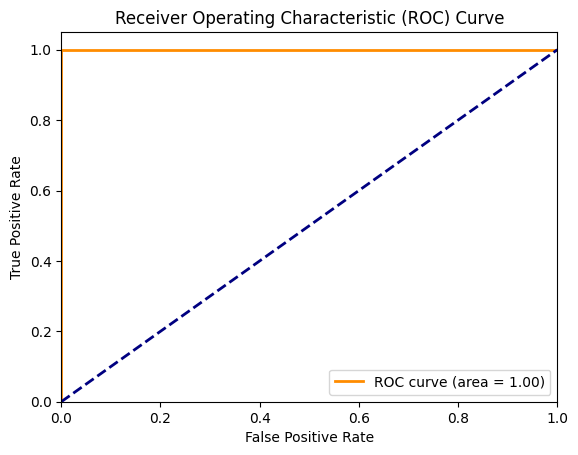

In [253]:
# AUC y curva ROC - Set de entrenamiento
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener las probabilidades de predicción para la clase positiva
y_pred_proba = rf_model.predict_proba(X_train)[:,1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)

# Calcular el AUC
roc_auc = auc(fpr, tpr)
print("El AUC es: ", roc_auc)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()

In [254]:
# De la matriz de confusion del set de validación: 
VP2 = 420
FP2 = 17
FN2 = 15
VN2 = 2

ex = (VP2+VN2)/(VP2+VN2+FP2+FN2)
esp = (VN2)/(VN2+FP2)
prec = (VP2)/(VP2+FP2)
sens = (VP2)/(VP2+FN2)

print("Exactitud = ",ex)
print("Especificidad = ",esp)
print("Precisión = ",prec)
print("Sensibilidad = ",sens)

Exactitud =  0.9295154185022027
Especificidad =  0.10526315789473684
Precisión =  0.9610983981693364
Sensibilidad =  0.9655172413793104


El AUC es:  0.758513931888545


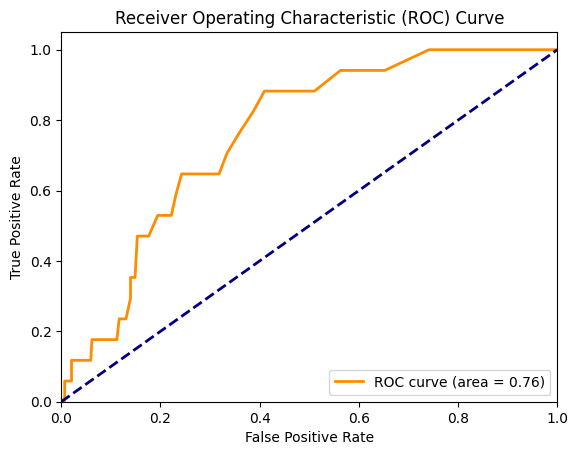

In [255]:
# AUC y curva ROC - Set de validación
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener las probabilidades de predicción para la clase positiva
y_pred_proba = rf_model.predict_proba(X_val)[:,1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

# Calcular el AUC
roc_auc = auc(fpr, tpr)
print("El AUC es: ", roc_auc)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()

In [256]:
# De la matriz de confusion del set de prueba: 
VP3 = 447
FP3 = 29
FN3 = 22
VN3 = 6

ex = (VP3+VN3)/(VP3+VN3+FP3+FN3)
esp = (VN3)/(VN3+FP3)
prec = (VP3)/(VP3+FP3)
sens = (VP3)/(VP3+FN3)

print("Exactitud = ",ex)
print("Especificidad = ",esp)
print("Precisión = ",prec)
print("Sensibilidad = ",sens)

Exactitud =  0.8988095238095238
Especificidad =  0.17142857142857143
Precisión =  0.9390756302521008
Sensibilidad =  0.9530916844349681


El AUC es:  0.8160264105642256


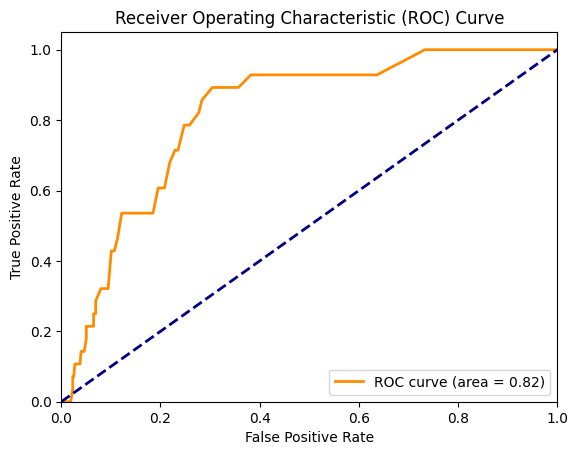

In [257]:
# AUC y curva ROC - Set de prueba
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener las probabilidades de predicción para la clase positiva
y_pred_proba = rf_model.predict_proba(X_test)[:,1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el AUC
roc_auc = auc(fpr, tpr)
print("El AUC es: ", roc_auc)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()

## Algoritmo SVM

In [258]:
# Matriz de confusión para el set de entrenamiento
print("Matriz de confusión para el set de entrenamiento:")
classificationSummary(y_train, svm_model.predict(X_train))

# Matriz de confusión para el set de validación
print("Matriz de confusión para el set de validación:")
classificationSummary(y_val, svm_model.predict(X_val))

# Matriz de confusión para el set de prueba
print("Matriz de confusión para el set de prueba:")
classificationSummary(y_test, svm_model.predict(X_test))

Matriz de confusión para el set de entrenamiento:
Confusion Matrix (Accuracy 0.8404)

       Prediction
Actual    0    1
     0 3363  527
     1  124   66
Matriz de confusión para el set de validación:
Confusion Matrix (Accuracy 0.8700)

       Prediction
Actual   0   1
     0 390  47
     1  12   5
Matriz de confusión para el set de prueba:
Confusion Matrix (Accuracy 0.8393)

       Prediction
Actual   0   1
     0 414  62
     1  19   9


In [259]:
# De la matriz de confusion del set de entrenamiento: 
VP1 = 3363
FP1 = 527
FN1 = 124
VN1 = 66


ex = (VP1+VN1)/(VP1+VN1+FP1+FN1)
esp = (VN1)/(VN1+FP1)
prec = (VP1)/(VP1+FP1)
sens = (VP1)/(VP1+FN1)

print("Exactitud = ",ex)
print("Especificidad = ",esp)
print("Precisión = ",prec)
print("Sensibilidad = ",sens)

Exactitud =  0.8404411764705882
Especificidad =  0.11129848229342328
Precisión =  0.8645244215938304
Sensibilidad =  0.9644393461428161


El AUC es:  0.7204194290353132


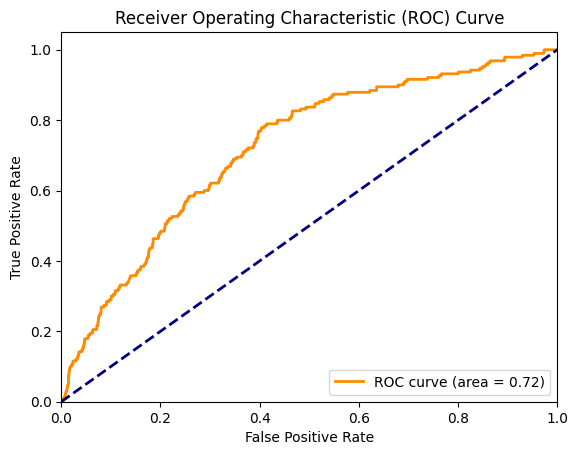

In [260]:
# AUC y curva ROC - Set de entrenamiento
# Obtener las probabilidades de predicción para la clase positiva
y_pred_proba = svm_model.predict_proba(X_train)[:,1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)

# Calcular el AUC
roc_auc = auc(fpr, tpr)
print("El AUC es: ", roc_auc)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()

In [261]:
# De la matriz de confusion del set de validación: 
VP2 = 390
FP2 = 47
FN2 = 12
VN2 = 5

ex = (VP2+VN2)/(VP2+VN2+FP2+FN2)
esp = (VN2)/(VN2+FP2)
prec = (VP2)/(VP2+FP2)
sens = (VP2)/(VP2+FN2)

print("Exactitud = ",ex)
print("Especificidad = ",esp)
print("Precisión = ",prec)
print("Sensibilidad = ",sens)

Exactitud =  0.8700440528634361
Especificidad =  0.09615384615384616
Precisión =  0.8924485125858124
Sensibilidad =  0.9701492537313433


El AUC es:  0.7188046843451339


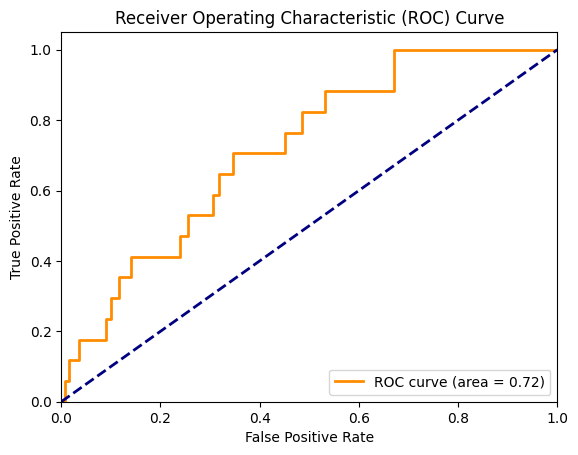

In [262]:
# AUC y curva ROC - Set de validación
# Obtener las probabilidades de predicción para la clase positiva
y_pred_proba = svm_model.predict_proba(X_val)[:,1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

# Calcular el AUC
roc_auc = auc(fpr, tpr)
print("El AUC es: ", roc_auc)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()

In [263]:
# De la matriz de confusion del set de prueba: 
VP3 = 414
FP3 = 62
FN3 = 19
VN3 = 9

ex = (VP3+VN3)/(VP3+VN3+FP3+FN3)
esp = (VN3)/(VN3+FP3)
prec = (VP3)/(VP3+FP3)
sens = (VP3)/(VP3+FN3)

print("Exactitud = ",ex)
print("Especificidad = ",esp)
print("Precisión = ",prec)
print("Sensibilidad = ",sens)

Exactitud =  0.8392857142857143
Especificidad =  0.1267605633802817
Precisión =  0.8697478991596639
Sensibilidad =  0.9561200923787528


El AUC es:  0.7551020408163266


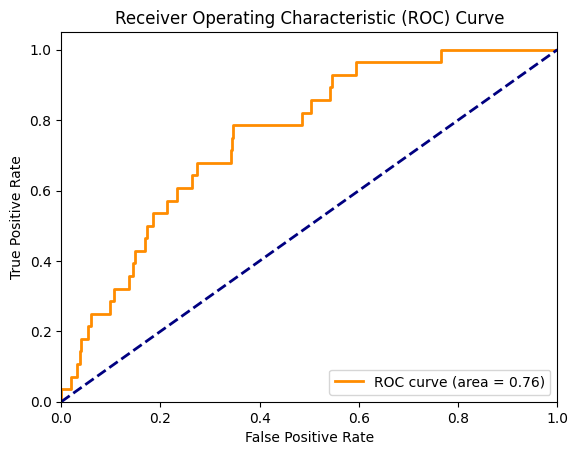

In [264]:
# AUC y curva ROC - Set de test
# Obtener las probabilidades de predicción para la clase positiva
y_pred_proba = svm_model.predict_proba(X_test)[:,1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el AUC
roc_auc = auc(fpr, tpr)
print("El AUC es: ", roc_auc)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()

## Algoritmo Naives Bayes

In [265]:
# Matriz de confusión para el set de entrenamiento
print("Matriz de confusión para el set de entrenamiento:")
classificationSummary(y_train, nb_model.predict(X_train))

# Matriz de confusión para el set de validación
print("Matriz de confusión para el set de validación:")
classificationSummary(y_val, nb_model.predict(X_val))

# Matriz de confusión para el set de prueba
print("Matriz de confusión para el set de prueba:")
classificationSummary(y_test, nb_model.predict(X_test))

Matriz de confusión para el set de entrenamiento:
Confusion Matrix (Accuracy 0.3846)

       Prediction
Actual    0    1
     0 1413 2477
     1   34  156
Matriz de confusión para el set de validación:
Confusion Matrix (Accuracy 0.3943)

       Prediction
Actual   0   1
     0 166 271
     1   4  13
Matriz de confusión para el set de prueba:
Confusion Matrix (Accuracy 0.3889)

       Prediction
Actual   0   1
     0 172 304
     1   4  24


In [266]:
# De la matriz de confusion del set de entrenamiento: 
VP1 = 1413
FP1 = 2477
FN1 = 34
VN1 = 156


ex = (VP1+VN1)/(VP1+VN1+FP1+FN1)
esp = (VN1)/(VN1+FP1)
prec = (VP1)/(VP1+FP1)
sens = (VP1)/(VP1+FN1)

print("Exactitud = ",ex)
print("Especificidad = ",esp)
print("Precisión = ",prec)
print("Sensibilidad = ",sens)


Exactitud =  0.3845588235294118
Especificidad =  0.059248006076718575
Precisión =  0.36323907455012855
Sensibilidad =  0.9765031098825155


El AUC es:  0.6734271411175754


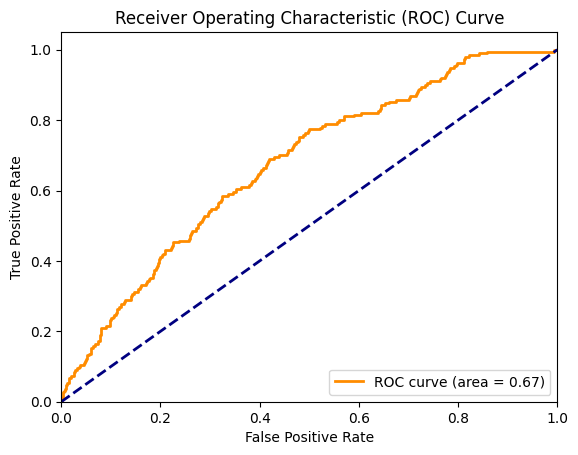

In [267]:
# AUC y curva ROC - Set de entrenamiento
# Obtener las probabilidades de predicción para la clase positiva
y_pred_proba = nb_model.predict_proba(X_train)[:,1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)

# Calcular el AUC
roc_auc = auc(fpr, tpr)
print("El AUC es: ", roc_auc)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()

In [268]:
# De la matriz de confusion del set de validación: 
VP2 = 166
FP2 = 271
FN2 = 4
VN2 = 13

ex = (VP2+VN2)/(VP2+VN2+FP2+FN2)
esp = (VN2)/(VN2+FP2)
prec = (VP2)/(VP2+FP2)
sens = (VP2)/(VP2+FN2)

print("Exactitud = ",ex)
print("Especificidad = ",esp)
print("Precisión = ",prec)
print("Sensibilidad = ",sens)


Exactitud =  0.394273127753304
Especificidad =  0.045774647887323945
Precisión =  0.37986270022883295
Sensibilidad =  0.9764705882352941


El AUC es:  0.5382958675461031


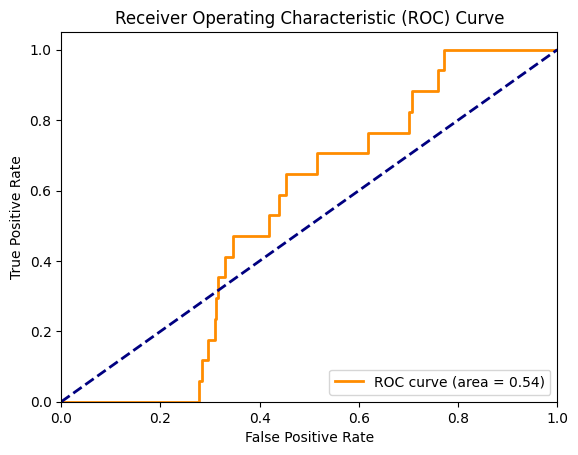

In [269]:
# AUC y curva ROC - Set de entrenamiento
# Obtener las probabilidades de predicción para la clase positiva
y_pred_proba = nb_model.predict_proba(X_val)[:,1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

# Calcular el AUC
roc_auc = auc(fpr, tpr)
print("El AUC es: ", roc_auc)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()

In [270]:
# De la matriz de confusion del set de prueba: 
VP3 = 172
FP3 = 304
FN3 = 4
VN3 = 24

ex = (VP3+VN3)/(VP3+VN3+FP3+FN3)
esp = (VN3)/(VN3+FP3)
prec = (VP3)/(VP3+FP3)
sens = (VP3)/(VP3+FN3)

print("Exactitud = ",ex)
print("Especificidad = ",esp)
print("Precisión = ",prec)
print("Sensibilidad = ",sens)

Exactitud =  0.3888888888888889
Especificidad =  0.07317073170731707
Precisión =  0.36134453781512604
Sensibilidad =  0.9772727272727273


El AUC es:  0.6670918367346939


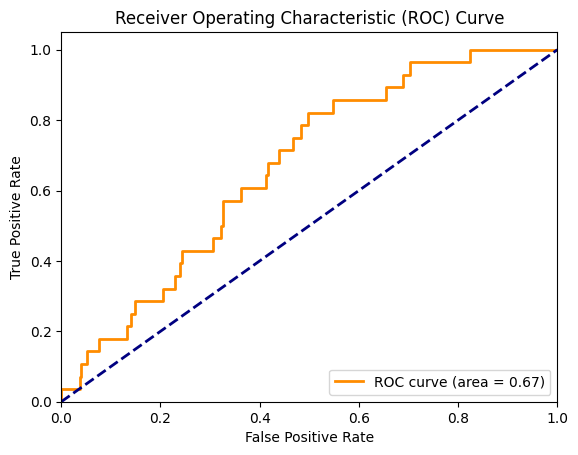

In [271]:
# AUC y curva ROC - Set de entrenamiento
# Obtener las probabilidades de predicción para la clase positiva
y_pred_proba = nb_model.predict_proba(X_test)[:,1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el AUC
roc_auc = auc(fpr, tpr)
print("El AUC es: ", roc_auc)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()

## Algoritmo K-Vacinos mas Cercanos

In [272]:

# Matriz de confusión para el set de entrenamiento
print("Matriz de confusión para el set de entrenamiento:")
train_preds = knn_model.predict(X_train)
print(confusion_matrix(y_train, train_preds))

# Matriz de confusión para el set de validación
print("Matriz de confusión para el set de validación:")
val_preds = knn_model.predict(X_val)
print(confusion_matrix(y_val, val_preds))

# Matriz de confusión para el set de prueba
print("Matriz de confusión para el set de prueba:")
test_preds = knn_model.predict(X_test)
print(confusion_matrix(y_test, test_preds))

Matriz de confusión para el set de entrenamiento:
[[3361  529]
 [   0  190]]
Matriz de confusión para el set de validación:
[[365  72]
 [  8   9]]
Matriz de confusión para el set de prueba:
[[402  74]
 [ 10  18]]


In [273]:
# De la matriz de confusion del set de entrenamiento: 
VP1 = 3361
FP1 = 529
FN1 = 0
VN1 = 190


ex = (VP1+VN1)/(VP1+VN1+FP1+FN1)
esp = (VN1)/(VN1+FP1)
prec = (VP1)/(VP1+FP1)
sens = (VP1)/(VP1+FN1)

In [274]:
# De la matriz de confusion del set de validación: 
VP2 = 365
FP2 = 72
FN2 = 8
VN2 = 9

ex = (VP2+VN2)/(VP2+VN2+FP2+FN2)
esp = (VN2)/(VN2+FP2)
prec = (VP2)/(VP2+FP2)
sens = (VP2)/(VP2+FN2)

print("Exactitud = ",ex)
print("Especificidad = ",esp)
print("Precisión = ",prec)
print("Sensibilidad = ",sens)

Exactitud =  0.8237885462555066
Especificidad =  0.1111111111111111
Precisión =  0.8352402745995423
Sensibilidad =  0.9785522788203753


In [275]:
# De la matriz de confusion del set de prueba: 
VP3 = 402
FP3 = 74
FN3 = 10
VN3 = 18

ex = (VP3+VN3)/(VP3+VN3+FP3+FN3)
esp = (VN3)/(VN3+FP3)
prec = (VP3)/(VP3+FP3)
sens = (VP3)/(VP3+FN3)

print("Exactitud = ",ex)
print("Especificidad = ",esp)
print("Precisión = ",prec)
print("Sensibilidad = ",sens)

Exactitud =  0.8333333333333334
Especificidad =  0.1956521739130435
Precisión =  0.8445378151260504
Sensibilidad =  0.9757281553398058


In [276]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [277]:
# Obtener las probabilidades de predicción para la clase positiva
y_pred_proba = knn_model.predict(X_test)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.7436974789915967


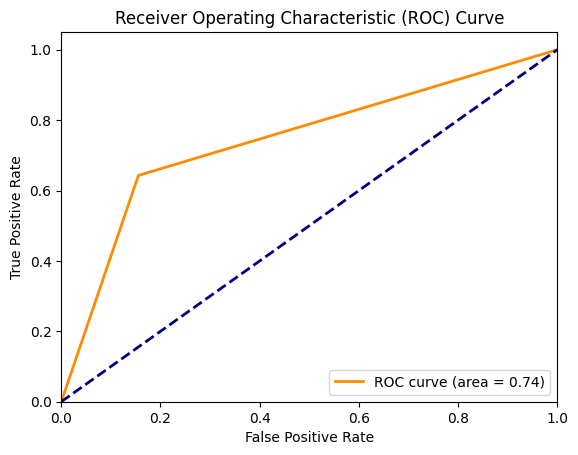

None


In [278]:
# Graficar la curva ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

print(plt.show())

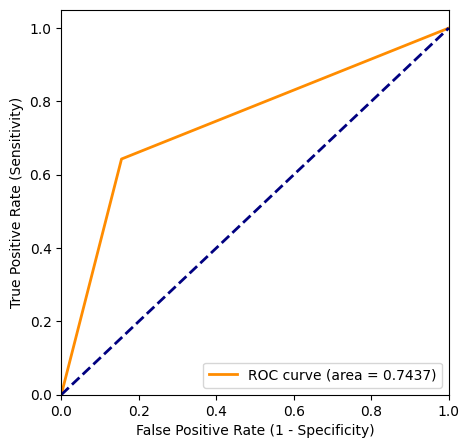

In [279]:
plt.figure(figsize=[5, 5])
#line width
lw = 2
#agrega ROC
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
#agrega el random guess
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

Random Forest par seleccionar las variables predictivas más importantes para la predicción. 

In [403]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [406]:
#Prueba 1 con n_estimators: 100 
# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
rf_model.fit(X_train_resampled, y_train_resampled)

# Hacer predicciones en el conjunto de validación
y_val_pred = rf_model.predict(X_val)

# Calcular la precisión en el conjunto de validación
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Precisión en conjunto de validación:", val_accuracy)

# Hacer predicciones en el conjunto de prueba
y_test_pred = rf_model.predict(X_test)

# Evaluar la importancia de las variables
importances = pd.Series(rf.feature_importances_, index=X_train_resampled.columns)
importances.sort_values(ascending=False, inplace=True)

# Seleccionar las variables más importantes
selected_features = importances[:5].index.tolist()

# Ajustar el modelo utilizando sólo las variables más importantes
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_resampled[selected_features], y_train_resampled)

# imprimir la importancia de las características
print(importances)

Precisión en conjunto de validación: 0.9295154185022027
Avg_glucose_level    0.264632
Bmi                  0.242189
Age                  0.240479
Residence            0.033115
Gender               0.031701
Hypertension         0.027653
Heart Disease        0.025715
never smoked         0.025038
formerly smoked      0.025029
Private              0.024303
Self-employed        0.021290
Married              0.018800
smokes               0.018787
children             0.001259
Never_worked         0.000009
dtype: float64
